In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install ultralytics opencv-python matplotlib

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q ultralytics opencv-python matplotlib

In [ ]:
!unzip -uq "/content/drive/MyDrive/TOPVIEWDATASET.zip" -d "/content"


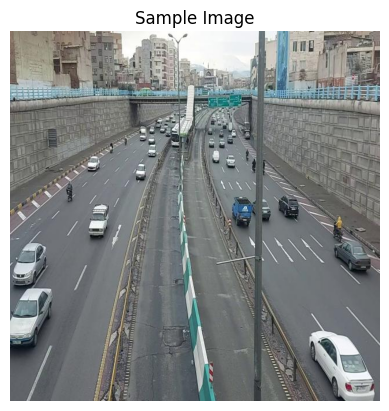

In [ ]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import cv2

# Define path to dataset

dataset_path = Path("/content/No_Apply_Grayscale/No_Apply_Grayscale/Vehicles_Detection.v8i.yolov8")
images_path = dataset_path / "train/images"
labels_path = dataset_path / "train/labels"

# Preview samplie image
sample_image = list(images_path.glob("*.jpg"))[0]
img = cv2.imread(str(sample_image))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Sample Image")
plt.axis('off')
plt.show()


In [ ]:
classes = ['Bus', 'Car', 'Motorcycle', 'Pickup', 'Truck']  # Your 5 classes

yaml_content = f"""\
train: /content/No_Apply_Grayscale/No_Apply_Grayscale/Vehicles_Detection.v8i.yolov8/train/images
val: /content/No_Apply_Grayscale/No_Apply_Grayscale/Vehicles_Detection.v8i.yolov8/valid/images

nc: {len(classes)}
names:
"""

for cls in classes:
    yaml_content += f"  - {cls}\n"

with open("vehicle_data.yaml", "w") as f:
    f.write(yaml_content)

print("YOLO config YAML file created with 5 classes.")



YOLO config YAML file created with 5 classes.


In [ ]:
!pip install ultralytics


In [ ]:
from pathlib import Path

train_path = Path("/content/No_Apply_Grayscale/No_Apply_Grayscale/Vehicles_Detection.v8i.yolov8/train/images")
val_path = Path("/content/No_Apply_Grayscale/No_Apply_Grayscale/Vehicles_Detection.v8i.yolov8/valid/images")

print("Train images found:", len(list(train_path.glob("*.jpg"))))
print("Val images found:", len(list(val_path.glob("*.jpg"))))


Train images found: 102
Val images found: 28


In [ ]:


# Import YOLO from ultralytics
from ultralytics import YOLO

# Load a pretrained YOLOv8 nano model (fast, lightweight)
model = YOLO('yolov8s.pt')

# Train the model on your dataset with 30 epochs and 640x640 images
model.train(
    data="/content/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/data.yaml",  # Path to your YAML config
    epochs=10,                 # You can increase epochs if needed
    imgsz=640,                 # Image size YOLO resizes inputs to
    batch=32,                  # Batch size (adjust if you get memory errors)
    name="vehicle_detector"    # Folder name to save this run
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 192MB/s]


Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=vehicle_detector, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, p

100%|██████████| 755k/755k [00:00<00:00, 20.8MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

  8                  -1  1   1838080  ultralytics.nn.modules.block.C2f             [512, 512, 1, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    591360  ultralytics.nn.modules.block.C2f             [768, 256, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 16                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128,

100%|██████████| 5.35M/5.35M [00:00<00:00, 107MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 606.7±116.4 MB/s, size: 55.0 KB)


train: Scanning /content/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/train/labels... 136 images, 2 backgrounds, 0 corrupt: 100%|██████████| 136/136 [00:00<00:00, 2216.29it/s]

train: New cache created: /content/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 412.2±60.8 MB/s, size: 46.4 KB)


val: Scanning /content/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/valid/labels... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<00:00, 1491.52it/s]

val: New cache created: /content/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/valid/labels.cache


Plotting labels to runs/detect/vehicle_detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/vehicle_detector
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      6.92G      1.471      4.118      1.076        153        640: 100%|██████████| 5/5 [00:06<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.31s/it]

                   all         28        563       0.23     0.0359     0.0309     0.0165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/10      6.97G      1.392      3.372      1.036        208        640: 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         28        563       0.53      0.112      0.143     0.0928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.01G      1.245       1.72       0.96        140        640: 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         28        563      0.456      0.333      0.239      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      7.04G      1.192      1.193     0.9522        119        640: 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         28        563      0.461      0.422      0.361      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      7.08G      1.153      1.031     0.9288        228        640: 100%|██████████| 5/5 [00:02<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         28        563      0.453      0.465      0.399      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      7.11G      1.097     0.9102     0.9195        156        640: 100%|██████████| 5/5 [00:02<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         28        563      0.417      0.433      0.376      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      7.15G      1.066      0.897     0.9078        204        640: 100%|██████████| 5/5 [00:02<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         28        563      0.483      0.412      0.426      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      7.19G      1.076     0.8395     0.9071        163        640: 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         28        563      0.632      0.594      0.577      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.43G      1.018     0.7723     0.8948        108        640: 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         28        563       0.66      0.601      0.624      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      6.92G      1.023     0.7459      0.896        214        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         28        563      0.673      0.649       0.62      0.408



10 epochs completed in 0.013 hours.
Optimizer stripped from runs/detect/vehicle_detector/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/vehicle_detector/weights/best.pt, 22.5MB

Validating runs/detect/vehicle_detector/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


                   all         28        563       0.66      0.601      0.624      0.407
                   Bus          6          6       0.59      0.833      0.728      0.475
                   Car         23        398      0.761      0.686      0.792      0.527
            Motorcycle         18         92      0.879      0.478       0.59      0.329
                Pickup         22         59      0.777      0.508      0.636      0.418
                 Truck          8          8      0.293        0.5      0.374      0.288
Speed: 0.2ms preprocess, 6.4ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/vehicle_detector


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ee9ca4c54d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [ ]:
results = model.predict(
    source="/content/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/test/images",  # Folder or image path
    conf=0.25,                     # Confidence threshold
    save=True,                     # Save predictions with boxes
    save_txt=True,                 # Save as YOLO format text files
    project="results/detect",         # Output folder
    name="test_results"            # Subfolder name
)



image 1/13 /content/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/test/images/frame_0990_jpg.rf.a3223422e734a57442ee34a58d24d4b4.jpg: 640x640 22 Cars, 1 Motorcycle, 7.5ms
image 2/13 /content/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/test/images/frame_1004_jpg.rf.a6f441255e54620ea11fb3cf34fc0a97.jpg: 640x640 1 Bus, 19 Cars, 8 Motorcycles, 2 Pickups, 11.4ms
image 3/13 /content/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/test/images/frame_1018_jpg.rf.185b0b25bb53e1d0eb860dda162bb2ae.jpg: 640x640 1 Bus, 24 Cars, 7 Motorcycles, 6 Pickups, 8.8ms
image 4/13 /content/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/test/images/frame_1806_jpg.rf.4583992e61114207bd9379b7e0652549.jpg: 640x640 33 Cars, 2 Pickups, 7.5ms
image 5/13 /content/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/test/images/frame_3837_jpg.rf.7cdff66e6350318c835a7cf1b35525f0.jpg: 640x640 13 Cars, 1 Motorcycle, 1 Pickup, 11.6ms
image 6/13 /conte

In [ ]:
!zip -r /content/results.zip /content/results

  adding: content/results/ (stored 0%)
  adding: content/results/detect/ (stored 0%)
  adding: content/results/detect/test_results/ (stored 0%)
  adding: content/results/detect/test_results/frame_3837_jpg.rf.7cdff66e6350318c835a7cf1b35525f0.jpg (deflated 4%)
  adding: content/results/detect/test_results/frame_0990_jpg.rf.a3223422e734a57442ee34a58d24d4b4.jpg (deflated 5%)
  adding: content/results/detect/test_results/labels/ (stored 0%)
  adding: content/results/detect/test_results/labels/frame_8097_jpg.rf.762bcc82c7b05b2ebcabc219815dca50.txt (deflated 58%)
  adding: content/results/detect/test_results/labels/frame_7929_jpg.rf.02b89050254d7e4c8c8995125a555cfe.txt (deflated 58%)
  adding: content/results/detect/test_results/labels/frame_4363_jpg.rf.1b2237d870de9cc7618a46bf229d23ed.txt (deflated 27%)
  adding: content/results/detect/test_results/labels/frame_9106_jpg.rf.edaac933241f83e08bf00984c0e0c85f.txt (deflated 45%)
  adding: content/results/detect/test_results/labels/frame_1806_jpg.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
